# Data-Driven Water Management System

In [193]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [194]:
# Loading Dataset
file_path = "Water - 30min_01-04-2023_01-04-2025.xls"

In [195]:
# Skipping the initial rows
df = pd.read_excel(file_path, skiprows=16, header=None)

In [196]:
# Printing the dataset columns
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [197]:
# Setting the headers
columns = ["Date", "Time", "Bronte", "Dome_Tudor", "Fry", "Fussey", "Grey", "Library",
    "Seacole", "Southwood", "WM15", "WM2", "WM4", "WM5_1", "WM5", "WM6", "WM7"]
df.columns = columns

In [198]:
# Using the 'Date' column as the 'DateTime' column and dropping the original 'Date' and 'Time' columns
df["DateTime"] = pd.to_datetime(df["Date"])
df.drop(columns=["Date", "Time"], inplace=True)

In [199]:
# Reordering columns to make 'DateTime' the first column
cols = ["DateTime"] + [col for col in df.columns if col != "DateTime"]
df = df[cols]

In [200]:
# Checking the dimensions of the dataset
df.shape

(35087, 16)

In [201]:
# Displaying the first few rows to confirm the change
display(df.head())

,DateTime,Bronte,Dome_Tudor,Fry,Fussey,Grey,Library,Seacole,Southwood,WM15,WM2,WM4,WM5_1,WM5,WM6,WM7
0,2023-04-01 00:30:00,0.0,0.0,NaN,0.52,0.0,1000.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-01 01:00:00,0.0,0.0,NaN,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-04-01 01:30:00,0.0,0.0,NaN,0.00,0.0,1000.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-04-01 02:00:00,0.0,0.0,NaN,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-04-01 02:30:00,0.0,0.0,NaN,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
# Printing the last rows of the dataset
df.tail()

,DateTime,Bronte,Dome_Tudor,Fry,Fussey,Grey,Library,Seacole,Southwood,WM15,WM2,WM4,WM5_1,WM5,WM6,WM7
35082,2025-03-31 21:30:00,0.0,0.390000,0.0,0.0,0.0,0.000000,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35083,2025-03-31 22:00:00,0.0,0.689617,0.0,0.0,0.0,0.004994,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35084,2025-03-31 22:30:00,0.0,0.690000,0.0,0.0,0.0,0.000006,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35085,2025-03-31 23:00:00,0.0,0.620038,0.0,0.0,0.0,0.000000,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35086,2025-03-31 23:30:00,0.0,0.630345,0.0,0.0,0.0,0.000000,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
# Checking the missing values of the dataset
df.isnull().sum()

,0
DateTime,0
Bronte,20
Dome_Tudor,1
Fry,13634
Fussey,0
Grey,0
Library,0
Seacole,1
Southwood,9196
WM15,14287


In [204]:
# Removing the missing values from the dataset
df = df.dropna()

In [205]:
# Verifying the updated shape of the dataset
df.shape

(11601, 16)

In [206]:
# Verifying the missing values after handling
df.isnull().sum()

,0
DateTime,0
Bronte,0
Dome_Tudor,0
Fry,0
Fussey,0
Grey,0
Library,0
Seacole,0
Southwood,0
WM15,0


In [207]:
# Printing the head of the cleaned data
df.head()

,DateTime,Bronte,Dome_Tudor,Fry,Fussey,Grey,Library,Seacole,Southwood,WM15,WM2,WM4,WM5_1,WM5,WM6,WM7
14287,2024-01-23 15:00:00,0.04,0.62,0.021019,0.00,0.01,0.018,0.09,0.06,0.0,0.0,0.0,0.000018,0.000015,0.0,0.0
14288,2024-01-23 15:30:00,0.04,0.67,0.021019,0.55,0.02,0.035,0.06,0.05,0.0,0.0,0.0,0.000018,0.000015,0.0,0.0
14289,2024-01-23 16:00:00,0.29,0.67,0.021019,0.00,0.01,0.037,0.05,0.11,0.0,0.0,0.0,0.000018,0.000015,0.0,0.0
14290,2024-01-23 16:30:00,0.02,0.60,0.021019,0.52,0.02,0.031,0.25,0.05,0.0,0.0,0.0,0.000018,0.000015,0.0,0.0
14291,2024-01-23 17:00:00,0.11,0.60,0.021019,0.00,0.00,0.041,0.01,0.02,0.0,0.0,0.0,0.000018,0.000015,0.0,0.0


In [208]:
# Printing the summary statistics of the dataset
df.describe()

,DateTime,Bronte,Dome_Tudor,Fry,Fussey,Grey,Library,Seacole,Southwood,WM15,WM2,WM4,WM5_1,WM5,WM6,WM7
count,11601,11601.000000,11601.000000,11601.000000,11601.000000,11601.000000,11601.000000,11601.000000,11601.000000,11601.000000,11601.000000,11601.0,11601.000000,11601.000000,11601.000000,11601.000000
mean,2024-05-23 12:53:17.982932736,0.016359,0.488551,0.017792,0.029816,0.011631,0.015241,0.028204,0.017704,0.000019,0.000113,0.0,0.000065,0.000065,0.000011,0.000004
min,2024-01-23 15:00:00,0.000000,0.049972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2024-03-24 02:00:00,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2024-05-23 13:30:00,0.000000,0.480000,0.000000,0.000000,0.000000,0.005008,0.000006,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,2024-07-22 23:30:00,0.000028,0.580117,0.010000,0.000000,0.014945,0.022339,0.034237,0.019944,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,2024-09-21 09:30:00,0.500000,1.440000,0.629344,0.810000,0.350000,0.352000,0.390000,0.360000,0.022000,0.250000,0.0,0.232000,0.240000,0.020000,0.020000
std,NaN,0.059354,0.175024,0.048284,0.104051,0.022935,0.025048,0.051792,0.036468,0.000384,0.003076,0.0,0.002685,0.002792,0.000405,0.000279


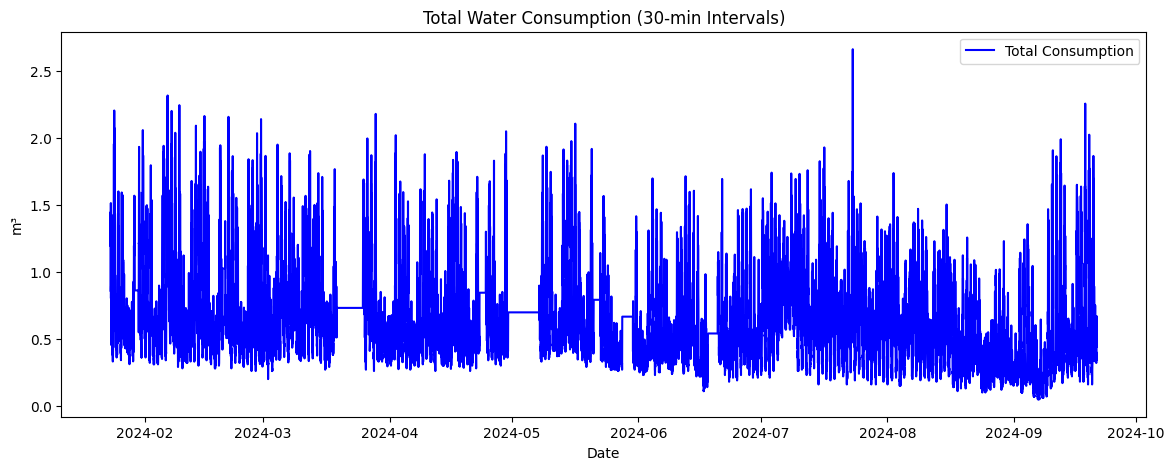

In [209]:
# Plotting total water consumption over time
df.set_index("DateTime", inplace=True)
df["Total"] = df.drop(columns=["Total"], errors="ignore").sum(axis=1)
plt.figure(figsize=(14,5))
plt.plot(df.index, df["Total"], label="Total Consumption", color="blue")
plt.title("Total Water Consumption (30-min Intervals)")
plt.xlabel("Date")
plt.ylabel("m³")
plt.legend()
plt.show()

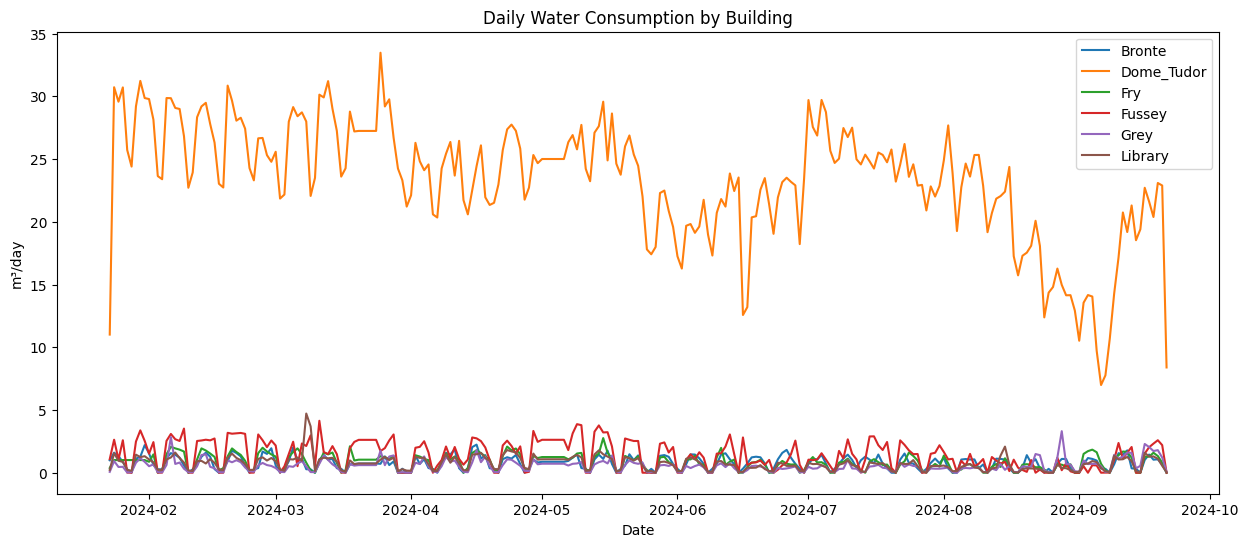

In [210]:
# Plotting Daily consumption per building
daily = df.resample("D").sum()
plt.figure(figsize=(15,6))
for col in ["Bronte","Dome_Tudor","Fry","Fussey","Grey","Library"]:
    plt.plot(daily.index, daily[col], label=col)
plt.title("Daily Water Consumption by Building")
plt.xlabel("Date")
plt.ylabel("m³/day")
plt.legend()
plt.show()

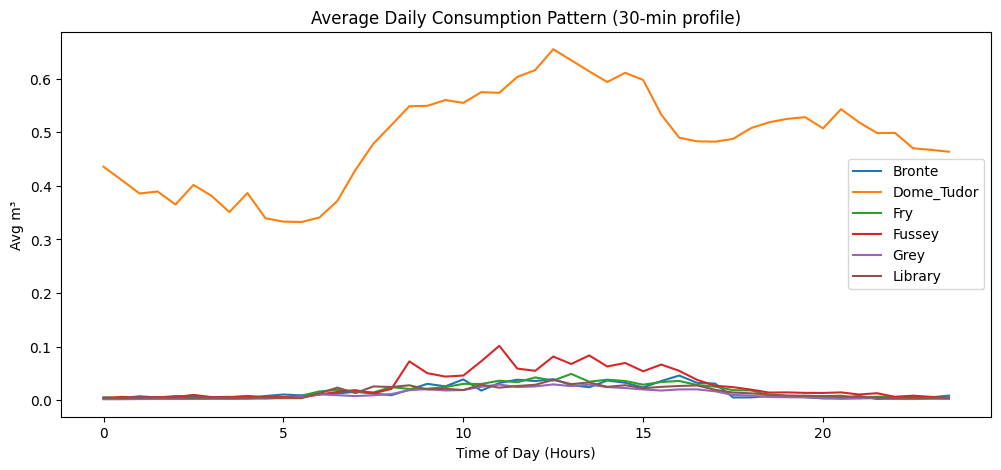

In [211]:
# Plotting Peak hour profile
avgProfile = df.groupby(df.index.time).mean()

# Converting the time index to a numerical representation
avgProfile.index = [t.hour + t.minute/60 for t in avgProfile.index]

plt.figure(figsize=(12,5))
for col in ["Bronte","Dome_Tudor","Fry","Fussey","Grey","Library"]:
    plt.plot(avgProfile.index, avgProfile[col], label=col)
plt.title("Average Daily Consumption Pattern (30-min profile)")
plt.xlabel("Time of Day (Hours)")
plt.ylabel("Avg m³")
plt.legend()
plt.show()

In [212]:
# Scaling the data
scaler = StandardScaler()
dailyScaled = scaler.fit_transform(daily["Dome_Tudor"].values.reshape(-1,1))

In [213]:
# Fitting a Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)
daily["DomeAnomaly"] = iso.fit_predict(dailyScaled)

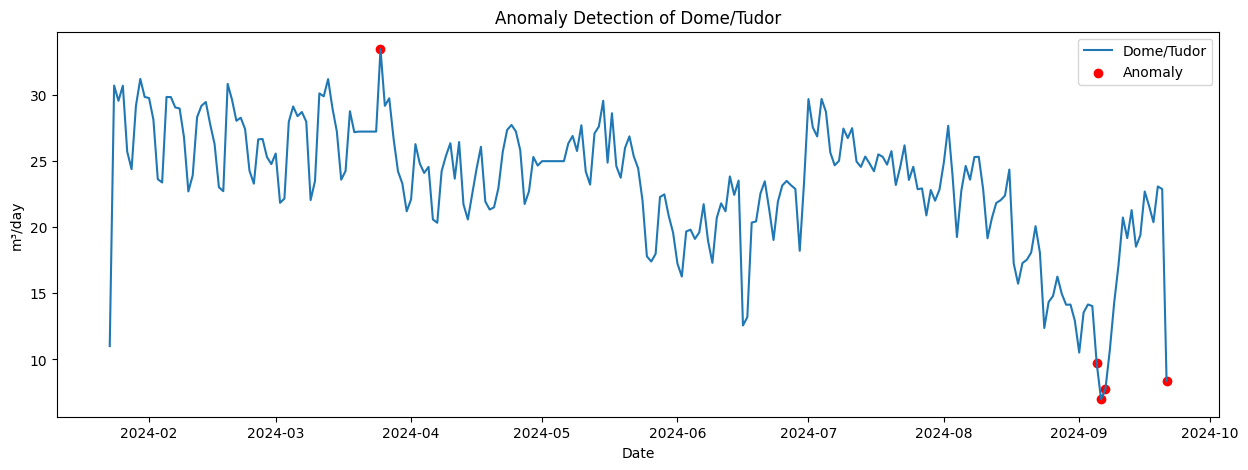

In [214]:
# Plotting anomalies
plt.figure(figsize=(15,5))
plt.plot(daily.index, daily["Dome_Tudor"], label="Dome/Tudor")
plt.scatter(daily[daily["DomeAnomaly"]==-1].index,
            daily[daily["DomeAnomaly"]==-1]["Dome_Tudor"],
            color="red", label="Anomaly")
plt.title("Anomaly Detection of Dome/Tudor")
plt.xlabel("Date")
plt.ylabel("m³/day")
plt.legend()
plt.show()

In [215]:
# Printing the daily head
daily.head()

,Bronte,Dome_Tudor,Fry,Fussey,Grey,Library,Seacole,Southwood,WM15,WM2,WM4,WM5_1,WM5,WM6,WM7,Total,DomeAnomaly
DateTime,,,,,,,,,,,,,,,,,
2024-01-23,0.99,11.01,0.378346,1.08,0.07,0.222,0.46,0.39,0.000,0.00,0.0,0.000319,0.000266,0.0,0.0,14.600931,1
2024-01-24,1.60,30.72,1.008922,2.63,0.93,1.557,3.00,1.62,0.000,0.04,0.0,0.000851,0.000709,0.0,0.0,43.107482,1
2024-01-25,1.32,29.57,1.008922,1.05,0.46,0.954,2.21,0.91,0.000,0.03,0.0,0.000851,0.000709,0.0,0.0,37.514482,1
2024-01-26,0.86,30.71,1.008922,2.59,0.47,0.862,1.77,0.79,0.000,0.01,0.0,0.000851,0.000709,0.0,0.0,39.072482,1
2024-01-27,0.27,25.72,1.008922,0.01,0.02,0.233,0.02,0.01,0.016,0.01,0.0,0.000851,0.000709,0.0,0.0,27.319482,1


In [216]:
# Checking the weekly report
weeklyReport = daily.resample("W").agg({
    "Total":"sum",
    "Dome_Tudor":"sum",
    "Bronte":"sum",
    "Fry":"sum",
    "Fussey":"sum",
    "Grey":"sum",
    "Library":"sum",
    "DomeAnomaly": lambda x: (x==-1).sum()})
weeklyReport.head()

,Total,Dome_Tudor,Bronte,Fry,Fussey,Grey,Library,DomeAnomaly
DateTime,,,,,,,,
2024-01-28,187.226338,152.13,5.04,5.422954,7.36,2.00,3.979,0
2024-02-04,250.898047,195.23,7.29,5.538360,12.37,4.08,6.345,0
2024-02-11,257.080000,191.23,6.18,9.190000,14.36,5.37,6.188,0
2024-02-18,237.666000,186.86,5.31,8.100000,13.04,4.28,4.947,0
2024-02-25,250.225000,191.85,6.37,7.630000,15.71,4.27,6.053,0


In [217]:
# Checking the Monthly report
monthlyReport = daily.resample("ME").agg({
    "Bronte":"sum",
    "Dome_Tudor":"sum",
    "Fry":"sum",
    "Fussey":"sum",
    "Grey":"sum",
    "Library":"sum",
    "Seacole":"sum",
    "Southwood":"sum",
    "WM15":"sum",
    "WM2":"sum",
    "WM4":"sum",
    "WM5_1":"sum",
    "WM5":"sum",
    "WM6":"sum",
    "WM7":"sum",
    "Total":"sum",
    "DomeAnomaly": lambda x: (x==-1).sum()})
monthlyAnomalies = daily.resample("ME").agg(lambda x: (x == -1).sum())
weeklyAnomalies = daily.resample("W").agg(lambda x: (x == -1).sum())

In [218]:
# Displaying the head of the monthly reports
display(monthlyReport.head())

,Bronte,Dome_Tudor,Fry,Fussey,Grey,Library,Seacole,Southwood,WM15,WM2,WM4,WM5_1,WM5,WM6,WM7,Total,DomeAnomaly
DateTime,,,,,,,,,,,,,,,,,
2024-01-31,9.630000,242.410000,8.449719,15.760000,4.830000,7.979000,15.070000,8.020000,0.016,0.09,0.0,0.007126,0.005938,0.00,0.00,312.267783,0
2024-02-29,26.070000,778.310000,34.131595,57.330000,17.680000,24.008000,48.650000,31.410000,0.107,0.22,0.0,0.055549,0.060458,0.04,0.05,1018.122603,0
2024-03-31,20.520000,832.830000,28.730000,52.850000,17.380000,30.355000,39.310000,24.230000,0.055,0.71,0.0,0.638000,0.630000,0.05,0.00,1048.288000,1
2024-04-30,25.286393,720.509344,30.491721,45.300246,19.102541,28.420246,33.822951,25.206721,0.001,0.01,0.0,0.014000,0.020000,0.00,0.00,928.185164,0
2024-05-31,26.003607,753.550656,31.368279,62.719754,18.307459,27.578754,33.247049,26.153279,0.036,0.00,0.0,0.007000,0.010000,0.02,0.00,979.001836,0


In [219]:
# Checking the Leak/Off-hour Usage
night = df.between_time("00:00","04:00")
nightFlags = (night > 0.05).astype(int)

In [220]:
# Defining a function to check longest Run
def longestRun(x):
    run, best = 0, 0
    for v in x:
        run = run+1 if v else 0
        best = max(best, run)
    return best
nightRuns = nightFlags.groupby(pd.Grouper(freq="D")).agg(longestRun)
suspectedLeaks = (nightRuns >= 4)

In [221]:
# Printing the head of the suspected data leaks
suspectedLeaks.head()

,Bronte,Dome_Tudor,Fry,Fussey,Grey,Library,Seacole,Southwood,WM15,WM2,WM4,WM5_1,WM5,WM6,WM7,Total
DateTime,,,,,,,,,,,,,,,,
2024-01-24,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2024-01-25,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2024-01-26,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2024-01-27,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2024-01-28,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [223]:
# Exporting to CSV
df.to_csv("Daily_Water_Consumption.csv")
weeklyReport.to_csv("Weekly_Report.csv")
suspectedLeaks.to_csv("Suspected_Leaks.csv")
monthlyReport.to_csv("Monthly_Report.csv")
monthlyAnomalies.to_csv("Monthly_Anomalies.csv")
weeklyAnomalies.to_csv("Weekly_Anomalies.csv")